![workflow graph](Figures/SolutionNo_4_length_7.png "Workflow Graph")

In [1]:
from pathlib import Path
import sys

import pandas as pd

sys.path.append('/Users/stevep/Documents/code/APE_thesis/ape-thesis')
from wrapper_functions import *    

## Workflow Input Objects

### Table 1
- id: `imbd_train`
- source: `/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/imbd/imbd_train_fixed.csv`
- DataClass: `MixedDataFrame`
- DataClass: `NoRelevance`    

In [2]:
imbd_train = load_table_csv('/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/imbd/imbd_train_fixed.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   review      50000 non-null  object
 2   sentiment   50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


None

,Unnamed: 0,review,sentiment
0,0,One of the other reviews has mentioned that af...,positive
1,1,A wonderful little production. The filling tec...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Letter Matter's ""Love in the Time of Money"" is...",positive


### Step 1: `train_test_split`
#### Notes
Splits a dataframe into X_train, y_train, X_test, y_test
    > returns strings instead of series if y is a string
    
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['imbd_train']`
	- src: `(0, 2)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['sentiment']`
	- src: `(0, 0)`
#### outputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `IndependentVariable`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `DependentVariable`
- 3
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `IndependentVariable`
- 4
	- DataClass: `StrColumn`
	- StatisticalRelevance: `DependentVariable`

In [3]:
mixedDataFrame_1_1, strColumn_1_2, mixedDataFrame_1_3, strColumn_1_4 = train_test_split(df=imbd_train, y='sentiment')

### Step 2: `get_text_from_html_i`
#### Notes
Extracts text from html using BeautifulSoup *inplace*
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `IndependentVariable`
	- src: `(1, 0)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
#### outputs:


In [4]:
get_text_from_html_i(data=mixedDataFrame_1_1, column='review')

/Users/stevep/Documents/code/APE_thesis/ape-thesis/wrapper_functions.py:1569: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


### Step 3: `expand_abbr_i`
#### Notes
Expands abbreviations using a dictionary loaded from a json file *inplace*
#### inputs:
- 1
	- DataClass: `Str`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['abrev.json']`
	- src: `(0, 5)`
- 2
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['imbd_train']`
	- src: `(0, 2)`
- 3
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
#### outputs:


In [5]:
expand_abbr_i(path_to_dict='abrev.json', data=imbd_train, column='review')

### Step 4: `replace_re_i`

#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `IndependentVariable`
	- src: `(1, 2)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
- 3
	- DataClass: `Str`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `[' ']`
	- src: `(0, 4)`
- 4
	- DataClass: `Str`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['[^a-zA-Z]']`
	- src: `(0, 3)`
#### outputs:


In [6]:
replace_re_i(data=mixedDataFrame_1_3, col='review', pattern=' ', replacer='[^a-zA-Z]')

### Step 5: `lemmatize_i`
#### Notes
Lemmatizes using spacy *inplace*
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['imbd_train']`
	- src: `(0, 2)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
#### outputs:


In [7]:
lemmatize_i(data=imbd_train, column='review')

### Step 6: `remove_stopwords_i`
#### Notes
Removes stopwords using spacy *inplace*
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['imbd_train']`
	- src: `(0, 2)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
#### outputs:


In [8]:
remove_stopwords_i(data=imbd_train, column='review')

### Step 7: `plot_wordcloud`
#### Notes
Plots a wordcloud for a dataframe or series
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `IndependentVariable`
	- src: `(1, 2)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['review']`
	- src: `(0, 1)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`

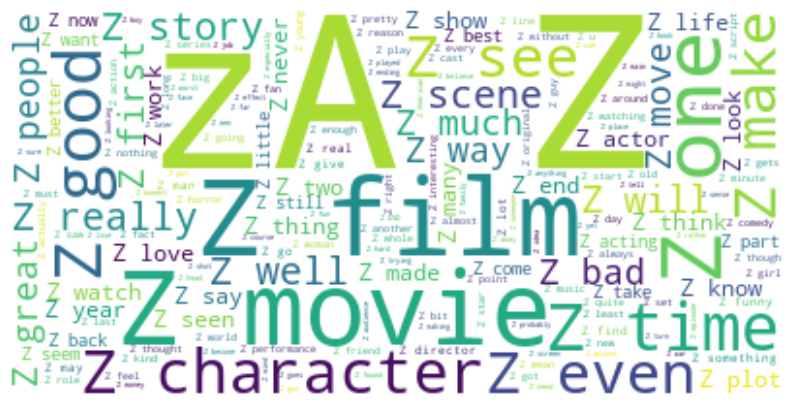

In [9]:
figure_7_1 = plot_wordcloud(data=mixedDataFrame_1_3, column='review')